In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

In [2]:
# set up solver
solver_config = dict(
    n=(128,),
    order=8,
    courant=0.79,
    snapshot_dt=2 * np.pi / 10,
    num_snapshots=10,
)


# set up problem
def vortex(x, y):
    return -y, x


problem_config = dict(
    u0="disk",
    x=(-1, 1),
    y=(-1, 1),
    v=vortex,
    PAD=(0, 1),
    bc="dirichlet",
    const={"u": 0, "trouble": 0},
)

# set up slope limiter
limiter_config = dict(
    flux_strategy="transverse",
    aposteriori_limiting=True,
    fallback_limiter="PP2D",
    convex=True,
    SED=True,
)

# execute solver
solver = AdvectionSolver(
    **solver_config,
    **problem_config,
    **limiter_config,
    load=False,
)
solver.rkorder()

# print mpp violations
solver.report_mpp_violations()

New solution instance...


100%|██████████| 6.283185307179586/6.283185307179586 [00:28]  



Wrote a solution up to t = 6.283185307179586 located at data/solutions/disk_dirichlet_{'u': 0, 'trouble': 0}_(128,)_(-1, 1)_(-1, 1)_0_0.6283185307179586_10_vortex_0.79_8_transverse_False_False_True_PP2D_True_False_False_False_True_1e-05_(0, 1)_False_False_1e-10_True_rk4_6.283185307179586.pkl


                       worst     frequency          mean
         upper  -1.17059e-03   7.34574e-02              
         lower  -8.43164e-04   9.99021e-01              
         total  -1.17059e-03   9.99021e-01  -7.88532e-06



Plot solution

Text(0, 0.5, '$y$')

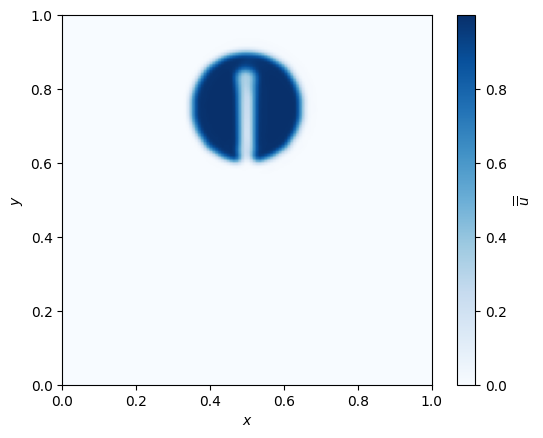

In [3]:
plt.imshow(np.flipud(solver.snapshots[-1]["u"]), extent=(0, 1, 0, 1), cmap="Blues")
plt.colorbar(label="$\overline{\overline{u}}$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Plot $1 - \theta$ for _a priori_ slope limiting

Text(0, 0.5, '$y$')

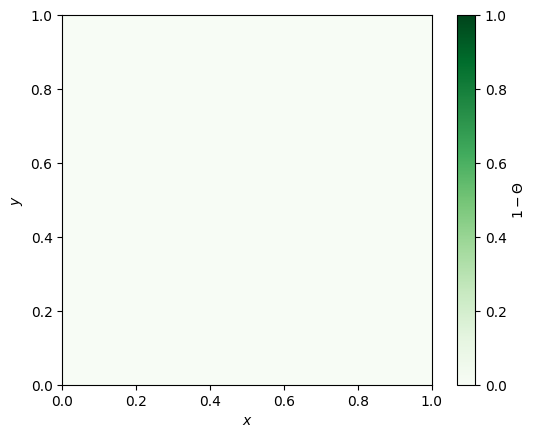

In [4]:
eps = 1e-3
hide_small_violations = np.logical_and(
    solver.snapshots[-1]["abs(M_ij - u)"] < eps,
    solver.snapshots[-1]["abs(m_ij - u)"] < eps,
)

plt.imshow(
    np.flipud(1 - np.where(hide_small_violations, 1, solver.snapshots[-1]["theta"])),
    extent=(0, 1, 0, 1),
    vmin=0,
    vmax=1,
    cmap="Greens",
)
plt.colorbar(label="$1 - \Theta$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Plot troubled cell inditator for _a posteriori_ slope limiting

Text(0, 0.5, '$y$')

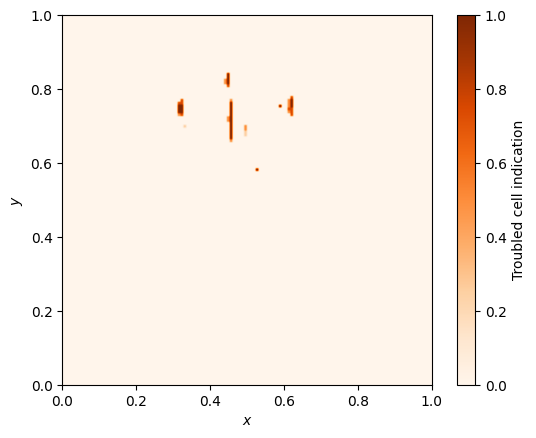

In [5]:
eps = 1e-5
hide_small_violations = np.logical_and(
    solver.snapshots[-1]["unew - M"] < eps,
    solver.snapshots[-1]["m - unew"] < eps,
)

plt.imshow(
    np.flipud(np.where(hide_small_violations, 0, solver.snapshots[-1]["trouble"])),
    extent=(0, 1, 0, 1),
    vmin=0,
    vmax=1,
    cmap="Oranges",
)
plt.colorbar(label="Troubled cell indication")
plt.xlabel("$x$")
plt.ylabel("$y$")